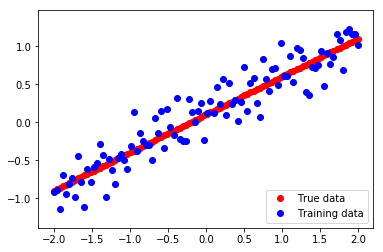

epoch 5
[W, b / loss] 0.4927, 0.1156 / 0.0438
 
epoch 10
[W, b / loss] 0.4946, 0.1179 / 0.0438
 
epoch 15
[W, b / loss] 0.4946, 0.1179 / 0.0438
 
epoch 20
[W, b / loss] 0.4946, 0.1179 / 0.0438
 
epoch 25
[W, b / loss] 0.4946, 0.1179 / 0.0438
 
epoch 30
[W, b / loss] 0.4946, 0.1179 / 0.0438
 
epoch 35
[W, b / loss] 0.4946, 0.1179 / 0.0438
 
epoch 40
[W, b / loss] 0.4946, 0.1179 / 0.0438
 
epoch 45
[W, b / loss] 0.4946, 0.1179 / 0.0438
 
epoch 50
[W, b / loss] 0.4946, 0.1179 / 0.0438
 
[Final: W, b] 0.4946, 0.1179
[Ref: W, b] 0.5000, 0.1000


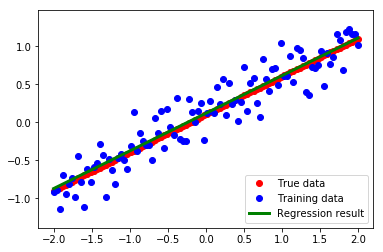

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
W_ref  = 0.5
b_ref = 0.1
nData = 100
noise_mu = 0
noise_std = 0.2
plt.figure(1)
X_train = np.linspace(-2,2,nData)
Y_test = W_ref * X_train + b_ref
Y_train = Y_test + np.random.normal(noise_mu, noise_std, nData)
plt.figure(1)
plt.plot(X_train, Y_test, 'ro', label='True data')
plt.plot(X_train, Y_train, 'bo', label='Training data')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()
X = tf.placeholder(tf.float32, name="input")
Y= tf.placeholder(tf.float32, name="output")
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")
Y_pred = tf.add(tf.multiply(X, W), b)
loss = tf.reduce_mean(tf.square(Y-Y_pred))
learning_rate  = 0.005
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
training_epochs = 50  # We will repeat the learning process 50 times
display_epoch    = 5
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_history = np.empty(shape=[1],dtype=float)
for epoch in range(training_epochs):
     for (x,y) in zip(X_train, Y_train):
         sess.run(optimizer, feed_dict={X:x, Y:y})
         cost_history = np.append(cost_history,sess.run(loss,feed_dict={X: x,Y: y}))
     # Print the result
     if (epoch+1) % display_epoch == 0:
         W_temp = sess.run(W)
         b_temp = sess.run(b)
         loss_temp = sess.run(loss, feed_dict={X: X_train, Y:Y_train})
         print ("epoch {}".format(epoch+1))
         print ("[W, b / loss] {:05.4f}, {:05.4f} / {:05.4f}".format(W_temp, b_temp, loss_temp))
         print (" ")

W_result = sess.run(W)
b_result = sess.run(b)
print ("[Final: W, b] {:05.4f}, {:05.4f}".format(W_result, b_result))
print ("[Ref: W, b] {:05.4f}, {:05.4f}".format(W_ref, b_ref))
plt.figure(2)
plt.plot(X_train, Y_test, 'ro', label='True data')
plt.plot(X_train, Y_train, 'bo', label='Training data')
plt.plot(X_train, W_result*X_train+b_result, 'g-', linewidth=3, label='Regression result')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()
sess.close()

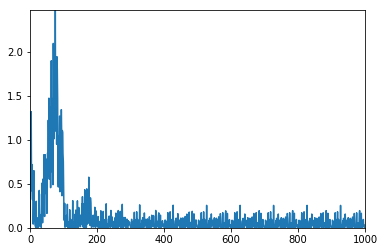

In [19]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,1000,0,np.max(cost_history)])
plt.show()
